In [207]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.cluster import KMeans
from sklearn.linear_model import LinearRegression
from sklearn.ensemble import RandomForestRegressor
from sklearn.ensemble import GradientBoostingRegressor
from sklearn.tree import DecisionTreeRegressor
from xgboost import XGBRegressor
from lightgbm import LGBMRegressor
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score
 
from scipy import stats
from textblob import TextBlob
from datetime import datetime

In [208]:
df_calender = pd.read_csv(r'D:\Business Analytics\capston\Airbnb\calendar.csv')
df_host = pd.read_csv(r'D:\Business Analytics\capston\Airbnb\hosts.csv')
df_listings = pd.read_csv(r'D:\Business Analytics\capston\Airbnb\listings.csv')
df_reviews = pd.read_csv(r'D:\Business Analytics\capston\Airbnb\reviews.csv')

In [209]:
df_calender.head()

,calender_id,listing_id,date,available,price,adjusted_price,minimum_nights,maximum_nights
0,1,40334325,2022-08-03 00:00:00.000000,0,56.0,56.0,3,5
1,2,22742449,2022-11-13 00:00:00.000000,1,95.0,95.0,2,99
2,3,34621717,2022-04-17 00:00:00.000000,0,75.0,75.0,2,1125
3,4,38281744,2022-01-31 00:00:00.000000,1,150.0,150.0,1,1000
4,5,18835003,2022-05-21 00:00:00.000000,0,100.0,100.0,2,1125


In [210]:
df_host.head()

,host_id,host_name,host_since,host_location,host_about
0,234077,Karin,2010-09-14 00:00:00.000000,"Antwerp, Flanders, Belgium",Ever since my childhood I dreamt of having my ...
1,334804,Ann,2011-01-04 00:00:00.000000,"Antwerp, Flemish Region, Belgium","Ciao, \r\nlooking forward to meet you!\r\nI lo..."
2,413052,Valérie,2011-02-27 00:00:00.000000,"Antwerp, Flanders, Belgium",NaN
3,452791,Tatiana,2011-03-20 00:00:00.000000,"Antwerp, Flanders, Belgium",World traveler with a penchant for adrenaline ...
4,462975,Els,2011-03-25 00:00:00.000000,"Edegem, Flanders, Belgium",I studied languages and cultural anthropology ...


In [211]:
df_listings.head()

,listing_id,listing_url,name,description,latitude,longitude,property_type,room_type,accomodates,bathrooms_text,bedrooms,beds,amenities,host_id
0,50904,https://www.airbnb.com/rooms/50904,aplace/antwerp: cosy suite - fashion district,Decorated in a vintage style combined with a f...,51.218575,4.398631,Room in boutique hotel,Hotel room,2,1 private bath,1.0,1.0,"[""Kitchen"", ""Smoke alarm"", ""Hair dryer"", ""Keyp...",234077
1,116134,https://www.airbnb.com/rooms/116134,Spacious apartment nearby Mas,Enjoy your stay at our 4 person apartment in t...,51.230510,4.405930,Entire rental unit,Entire home/apt,4,2.5 baths,2.0,2.0,"[""Refrigerator"", ""Elevator"", ""Paid street park...",586942
2,218916,https://www.airbnb.com/rooms/218916,Apartment with terrace in trendy Zurenborg,Do you enjoy authentic places with a lot of ch...,51.206330,4.429420,Entire condominium (condo),Entire home/apt,5,1 bath,1.0,3.0,"[""Paid street parking off premises"", ""Kitchen""...",915664
3,224333,https://www.airbnb.com/rooms/224333,Large stylish room in 1930s house + garden,"Large bedroom in classic 1930s house. Kitchen,...",51.197720,4.458530,Private room in residential home,Private room,2,2 shared baths,1.0,1.0,"[""Fire extinguisher"", ""Backyard"", ""Long term s...",1167377
4,224682,https://www.airbnb.com/rooms/224682,APARTMENT ROSCAM - OLD CENTRE ANTWERP,"<b>The space</b><br />Apartment ""Roscam"" is a ...",51.217220,4.397900,Entire rental unit,Entire home/apt,3,1 bath,1.0,2.0,"[""Refrigerator"", ""Kitchen"", ""Smoke alarm"", ""Sh...",1263933


In [212]:
df_reviews.head()

,review_id,listing_id,date,reviewer_id,reviewer_name,comments
0,1,50904,2015-05-06 00:00:00.000000,19482395,Jihae,Karin’s “Aplace” is absolutely beautiful and c...
1,2,50904,2021-10-10 00:00:00.000000,333559,Emilie,"Karin is a wonderful host, she was really help..."
2,3,116134,2012-03-05 00:00:00.000000,928644,Aurélien,"Amazing flat, really close from the MAS Musem,..."
3,4,116134,2012-05-25 00:00:00.000000,231288,Gail,"This is a well equipped, very comfortable apar..."
4,5,116134,2013-09-03 00:00:00.000000,7984251,Marcel,This is a very nice appartement. We really lik...


Data Understanding and feature creation (Task 1)|

• Look at the table Calendar how many rows and unique listing ids are present? Are
there any implications when it comes to having more rows and less unique listing
ids?

In [213]:
df_calender.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 319192 entries, 0 to 319191
Data columns (total 8 columns):
 #   Column          Non-Null Count   Dtype  
---  ------          --------------   -----  
 0   calender_id     319192 non-null  int64  
 1   listing_id      319192 non-null  int64  
 2   date            319192 non-null  object 
 3   available       319192 non-null  int64  
 4   price           319117 non-null  float64
 5   adjusted_price  319117 non-null  float64
 6   minimum_nights  319192 non-null  int64  
 7   maximum_nights  319192 non-null  int64  
dtypes: float64(2), int64(5), object(1)
memory usage: 19.5+ MB


In [214]:
num_rows_calendar = df_calender.shape[0]
unique_listing_ids_calendar = df_calender['listing_id'].nunique()
num_rows_calendar, unique_listing_ids_calendar

(319192, 1749)

The significant difference between the number of rows and the number of unique listing IDs implies that each listing has multiple rows in the Calendar table. 

In [215]:
len(df_calender['listing_id'].unique())

1749

In [216]:
len(df_listings['listing_id'].unique())

1749

In [217]:
sorted(list(df_calender['listing_id'].unique())) == sorted(list(df_listings['listing_id'].unique()))

True

The above suggests that the unique listing_id values in the Calendar table are the same as those in the Listings table.

• Look at the price column in Calendar table. What transformations you will need to
perform so that you can create a column that can be used as a target/response
variable?

In [218]:
df_calender['price'] = df_calender['price'].astype(float)

In [219]:
df_calender['log_price'] = np.log(df_calender['price'] + 1)

Purpose and Benefits
Normalization: Logarithmic transformations are often used to normalize data, which can be particularly useful for machine learning algorithms that assume normally distributed input data.

Handle Skewed Data: If the 'price' column has a right-skewed distribution (many small values and a few large values), applying a log transformation can help in reducing this skewness.

Range Reduction: Log transformations can compress the range of data. This means large values become less extreme relative to small values, which can help in highlighting relative changes and making patterns more discernible.

Feature Engineering: Creating a new 'log_price' column provides an additional feature that can be useful for various analytical and modeling purposes, potentially improving the performance of predictive models.

In [220]:
scaler = StandardScaler()
df_calender['scaled_price'] = scaler.fit_transform(df_calender[['price']])

In [221]:
df_calender['price_per_night'] = df_calender['price'] / df_calender['minimum_nights']
print(df_calender[['listing_id', 'date', 'price', 'log_price', 'scaled_price', 'price_per_night']])

        listing_id                        date  price  log_price  \
0         40334325  2022-08-03 00:00:00.000000   56.0   4.043051   
1         22742449  2022-11-13 00:00:00.000000   95.0   4.564348   
2         34621717  2022-04-17 00:00:00.000000   75.0   4.330733   
3         38281744  2022-01-31 00:00:00.000000  150.0   5.017280   
4         18835003  2022-05-21 00:00:00.000000  100.0   4.615121   
...            ...                         ...    ...        ...   
319187    52729945  2022-07-06 00:00:00.000000   64.0   4.174387   
319188    36953202  2022-07-08 00:00:00.000000  140.0   4.948760   
319189    39580214  2022-06-13 00:00:00.000000   49.0   3.912023   
319190    49016014  2022-10-26 00:00:00.000000   60.0   4.110874   
319191    31438714  2022-06-12 00:00:00.000000  104.0   4.653960   

        scaled_price  price_per_night  
0          -0.290207        18.666667  
1          -0.080293        47.500000  
2          -0.187941        37.500000  
3           0.215738   

• Look at the tables Listings, Hosts and Reviews to come up with a list of potential
transformations needed in order to have predictors that can be used to predict the
listing price.

In [222]:
room_type_encoded = pd.get_dummies(df_listings['room_type'], prefix='room_type')
room_type_encoded

,room_type_Entire home/apt,room_type_Hotel room,room_type_Private room,room_type_Shared room
0,0,1,0,0
1,1,0,0,0
2,1,0,0,0
3,0,0,1,0
4,1,0,0,0
...,...,...,...,...
1744,1,0,0,0
1745,1,0,0,0
1746,1,0,0,0
1747,1,0,0,0


In [223]:
property_type_encoded = pd.get_dummies(df_listings['property_type'], prefix='property_type')
property_type_encoded

,property_type_Boat,property_type_Casa particular,property_type_Castle,property_type_Entire condominium (condo),property_type_Entire cottage,property_type_Entire guest suite,property_type_Entire guesthouse,property_type_Entire loft,property_type_Entire rental unit,property_type_Entire residential home,...,property_type_Room in aparthotel,property_type_Room in boutique hotel,property_type_Room in hotel,property_type_Shared room in bed and breakfast,property_type_Shared room in casa particular,property_type_Shared room in loft,property_type_Shared room in residential home,property_type_Tent,property_type_Tiny house,property_type_Yurt
0,0,0,0,0,0,0,0,0,0,0,...,0,1,0,0,0,0,0,0,0,0
1,0,0,0,0,0,0,0,0,1,0,...,0,0,0,0,0,0,0,0,0,0
2,0,0,0,1,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,0,0,0,0,0,0,0,0,1,0,...,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1744,0,0,0,0,0,0,0,1,0,0,...,0,0,0,0,0,0,0,0,0,0
1745,0,0,0,0,0,0,0,0,1,0,...,0,0,0,0,0,0,0,0,0,0
1746,0,0,0,0,0,0,0,0,1,0,...,0,0,0,0,0,0,0,0,0,0
1747,0,0,1,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [224]:
df_host['host_since'] = pd.to_datetime(df_host['host_since'])
df_host['host_duration'] = (datetime.now() - df_host['host_since']).dt.days
df_host

,host_id,host_name,host_since,host_location,host_about,host_duration
0,234077,Karin,2010-09-14,"Antwerp, Flanders, Belgium",Ever since my childhood I dreamt of having my ...,5045
1,334804,Ann,2011-01-04,"Antwerp, Flemish Region, Belgium","Ciao, \r\nlooking forward to meet you!\r\nI lo...",4933
2,413052,Valérie,2011-02-27,"Antwerp, Flanders, Belgium",NaN,4879
3,452791,Tatiana,2011-03-20,"Antwerp, Flanders, Belgium",World traveler with a penchant for adrenaline ...,4858
4,462975,Els,2011-03-25,"Edegem, Flanders, Belgium",I studied languages and cultural anthropology ...,4853
...,...,...,...,...,...,...
1106,434049804,Mathias,2021-11-30,BE,NaN,950
1107,435722877,Tatjana,2021-12-12,BE,NaN,938
1108,435999398,Flor,2021-12-14,"Antwerp, Flanders, Belgium",NaN,936
1109,436739371,Naser,2021-12-20,BE,NaN,930


In [225]:
coords = df_listings[['latitude', 'longitude']]
kmeans = KMeans(n_clusters=5, random_state=42)
df_listings['region'] = kmeans.fit_predict(coords)
df_listings

,listing_id,listing_url,name,description,latitude,longitude,property_type,room_type,accomodates,bathrooms_text,bedrooms,beds,amenities,host_id,region
0,50904,https://www.airbnb.com/rooms/50904,aplace/antwerp: cosy suite - fashion district,Decorated in a vintage style combined with a f...,51.218575,4.398631,Room in boutique hotel,Hotel room,2,1 private bath,1.0,1.0,"[""Kitchen"", ""Smoke alarm"", ""Hair dryer"", ""Keyp...",234077,3
1,116134,https://www.airbnb.com/rooms/116134,Spacious apartment nearby Mas,Enjoy your stay at our 4 person apartment in t...,51.230510,4.405930,Entire rental unit,Entire home/apt,4,2.5 baths,2.0,2.0,"[""Refrigerator"", ""Elevator"", ""Paid street park...",586942,3
2,218916,https://www.airbnb.com/rooms/218916,Apartment with terrace in trendy Zurenborg,Do you enjoy authentic places with a lot of ch...,51.206330,4.429420,Entire condominium (condo),Entire home/apt,5,1 bath,1.0,3.0,"[""Paid street parking off premises"", ""Kitchen""...",915664,4
3,224333,https://www.airbnb.com/rooms/224333,Large stylish room in 1930s house + garden,"Large bedroom in classic 1930s house. Kitchen,...",51.197720,4.458530,Private room in residential home,Private room,2,2 shared baths,1.0,1.0,"[""Fire extinguisher"", ""Backyard"", ""Long term s...",1167377,0
4,224682,https://www.airbnb.com/rooms/224682,APARTMENT ROSCAM - OLD CENTRE ANTWERP,"<b>The space</b><br />Apartment ""Roscam"" is a ...",51.217220,4.397900,Entire rental unit,Entire home/apt,3,1 bath,1.0,2.0,"[""Refrigerator"", ""Kitchen"", ""Smoke alarm"", ""Sh...",1263933,3
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1744,53916524,https://www.airbnb.com/rooms/53916524,Industrial spacious loft in Antwerp!,Industrial loft (110m²) with a relaxing urban ...,51.231330,4.403520,Entire loft,Entire home/apt,2,1.5 baths,1.0,1.0,"[""Refrigerator"", ""Elevator"", ""Yamaha RX-A550 s...",46300712,3
1745,53928545,https://www.airbnb.com/rooms/53928545,Studio in het midden van Antwerpen,Recent gerenoveerde rustige studio van circa 2...,51.213210,4.397080,Entire rental unit,Entire home/apt,2,1 bath,NaN,1.0,"[""Hot water"", ""Long term stays allowed"", ""Kitc...",74268936,3
1746,53929354,https://www.airbnb.com/rooms/53929354,Mooi appartement met open haard,Vanuit deze ideaal gelegen accommodatie kun je...,51.200340,4.421060,Entire rental unit,Entire home/apt,4,1 bath,1.0,2.0,"[""Kitchen"", ""Smoke alarm"", ""Outdoor furniture""...",334036639,4
1747,53949105,https://www.airbnb.com/rooms/53949105,Kasteel Boterlaerhof vlakbij Antwerpen,"Kasteel Boterlaerhof ligt ideaal gelegen, op 1...",51.212320,4.482230,Castle,Entire home/apt,16,7.5 baths,7.0,33.0,"[""Refrigerator"", ""Private garden or backyard"",...",377595714,0


In [226]:
review_counts = df_reviews.groupby('listing_id').size().reset_index(name='num_reviews')
review_counts

,listing_id,num_reviews
0,50904,2
1,116134,120
2,218916,28
3,224333,3
4,224682,349
...,...,...
1520,53522234,2
1521,53538847,1
1522,53600839,1
1523,53819793,1


In [227]:
df_reviews['sentiment'] = df_reviews['comments'].apply(lambda x: TextBlob(str(x)).sentiment.polarity)
review_sentiment = df_reviews.groupby('listing_id')['sentiment'].mean().reset_index(name='avg_sentiment')
review_sentiment

,listing_id,avg_sentiment
0,50904,0.430455
1,116134,0.368805
2,218916,0.359143
3,224333,0.302546
4,224682,0.310607
...,...,...
1520,53522234,0.208333
1521,53538847,0.900000
1522,53600839,0.032598
1523,53819793,0.800000


In [228]:
df_listings = df_listings.merge(property_type_encoded, left_index=True, right_index=True)
df_listings = df_listings.merge(room_type_encoded, left_index=True, right_index=True)
df_listings = df_listings.merge(df_host[['host_id', 'host_duration']], on='host_id', how='left')
df_listings = df_listings.merge(review_counts, on='listing_id', how='left')
df_listings = df_listings.merge(review_sentiment, on='listing_id', how='left')

In [229]:
mean_price_per_listing = df_calender.groupby('listing_id')['price'].mean().reset_index(name='mean_price')
df_listings = df_listings.merge(mean_price_per_listing, on='listing_id', how='left')

In [230]:
df_listings

,listing_id,listing_url,name,description,latitude,longitude,property_type,room_type,accomodates,bathrooms_text,...,property_type_Tiny house,property_type_Yurt,room_type_Entire home/apt,room_type_Hotel room,room_type_Private room,room_type_Shared room,host_duration,num_reviews,avg_sentiment,mean_price
0,50904,https://www.airbnb.com/rooms/50904,aplace/antwerp: cosy suite - fashion district,Decorated in a vintage style combined with a f...,51.218575,4.398631,Room in boutique hotel,Hotel room,2,1 private bath,...,0,0,0,1,0,0,5045,2.0,0.430455,165.329670
1,116134,https://www.airbnb.com/rooms/116134,Spacious apartment nearby Mas,Enjoy your stay at our 4 person apartment in t...,51.230510,4.405930,Entire rental unit,Entire home/apt,4,2.5 baths,...,0,0,1,0,0,0,4803,120.0,0.368805,150.000000
2,218916,https://www.airbnb.com/rooms/218916,Apartment with terrace in trendy Zurenborg,Do you enjoy authentic places with a lot of ch...,51.206330,4.429420,Entire condominium (condo),Entire home/apt,5,1 bath,...,0,0,1,0,0,0,4722,28.0,0.359143,85.000000
3,224333,https://www.airbnb.com/rooms/224333,Large stylish room in 1930s house + garden,"Large bedroom in classic 1930s house. Kitchen,...",51.197720,4.458530,Private room in residential home,Private room,2,2 shared baths,...,0,0,0,0,1,0,4678,3.0,0.302546,16.000000
4,224682,https://www.airbnb.com/rooms/224682,APARTMENT ROSCAM - OLD CENTRE ANTWERP,"<b>The space</b><br />Apartment ""Roscam"" is a ...",51.217220,4.397900,Entire rental unit,Entire home/apt,3,1 bath,...,0,0,1,0,0,0,4656,349.0,0.310607,87.272727
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1744,53916524,https://www.airbnb.com/rooms/53916524,Industrial spacious loft in Antwerp!,Industrial loft (110m²) with a relaxing urban ...,51.231330,4.403520,Entire loft,Entire home/apt,2,1.5 baths,...,0,0,1,0,0,0,3192,NaN,NaN,88.000000
1745,53928545,https://www.airbnb.com/rooms/53928545,Studio in het midden van Antwerpen,Recent gerenoveerde rustige studio van circa 2...,51.213210,4.397080,Entire rental unit,Entire home/apt,2,1 bath,...,0,0,1,0,0,0,2963,NaN,NaN,49.000000
1746,53929354,https://www.airbnb.com/rooms/53929354,Mooi appartement met open haard,Vanuit deze ideaal gelegen accommodatie kun je...,51.200340,4.421060,Entire rental unit,Entire home/apt,4,1 bath,...,0,0,1,0,0,0,1613,NaN,NaN,90.000000
1747,53949105,https://www.airbnb.com/rooms/53949105,Kasteel Boterlaerhof vlakbij Antwerpen,"Kasteel Boterlaerhof ligt ideaal gelegen, op 1...",51.212320,4.482230,Castle,Entire home/apt,16,7.5 baths,...,0,0,1,0,0,0,1315,NaN,NaN,990.000000


• Create an aggregated view of data spread across different tables, containing the
target as well as predictor variables.

In [231]:
df_listings.fillna({
    'host_duration': df_listings['host_duration'].mean(),
    'num_reviews': 0,
    'avg_sentiment': 0
}, inplace=True)

In [232]:
df_listings

,listing_id,listing_url,name,description,latitude,longitude,property_type,room_type,accomodates,bathrooms_text,...,property_type_Tiny house,property_type_Yurt,room_type_Entire home/apt,room_type_Hotel room,room_type_Private room,room_type_Shared room,host_duration,num_reviews,avg_sentiment,mean_price
0,50904,https://www.airbnb.com/rooms/50904,aplace/antwerp: cosy suite - fashion district,Decorated in a vintage style combined with a f...,51.218575,4.398631,Room in boutique hotel,Hotel room,2,1 private bath,...,0,0,0,1,0,0,5045,2.0,0.430455,165.329670
1,116134,https://www.airbnb.com/rooms/116134,Spacious apartment nearby Mas,Enjoy your stay at our 4 person apartment in t...,51.230510,4.405930,Entire rental unit,Entire home/apt,4,2.5 baths,...,0,0,1,0,0,0,4803,120.0,0.368805,150.000000
2,218916,https://www.airbnb.com/rooms/218916,Apartment with terrace in trendy Zurenborg,Do you enjoy authentic places with a lot of ch...,51.206330,4.429420,Entire condominium (condo),Entire home/apt,5,1 bath,...,0,0,1,0,0,0,4722,28.0,0.359143,85.000000
3,224333,https://www.airbnb.com/rooms/224333,Large stylish room in 1930s house + garden,"Large bedroom in classic 1930s house. Kitchen,...",51.197720,4.458530,Private room in residential home,Private room,2,2 shared baths,...,0,0,0,0,1,0,4678,3.0,0.302546,16.000000
4,224682,https://www.airbnb.com/rooms/224682,APARTMENT ROSCAM - OLD CENTRE ANTWERP,"<b>The space</b><br />Apartment ""Roscam"" is a ...",51.217220,4.397900,Entire rental unit,Entire home/apt,3,1 bath,...,0,0,1,0,0,0,4656,349.0,0.310607,87.272727
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1744,53916524,https://www.airbnb.com/rooms/53916524,Industrial spacious loft in Antwerp!,Industrial loft (110m²) with a relaxing urban ...,51.231330,4.403520,Entire loft,Entire home/apt,2,1.5 baths,...,0,0,1,0,0,0,3192,0.0,0.000000,88.000000
1745,53928545,https://www.airbnb.com/rooms/53928545,Studio in het midden van Antwerpen,Recent gerenoveerde rustige studio van circa 2...,51.213210,4.397080,Entire rental unit,Entire home/apt,2,1 bath,...,0,0,1,0,0,0,2963,0.0,0.000000,49.000000
1746,53929354,https://www.airbnb.com/rooms/53929354,Mooi appartement met open haard,Vanuit deze ideaal gelegen accommodatie kun je...,51.200340,4.421060,Entire rental unit,Entire home/apt,4,1 bath,...,0,0,1,0,0,0,1613,0.0,0.000000,90.000000
1747,53949105,https://www.airbnb.com/rooms/53949105,Kasteel Boterlaerhof vlakbij Antwerpen,"Kasteel Boterlaerhof ligt ideaal gelegen, op 1...",51.212320,4.482230,Castle,Entire home/apt,16,7.5 baths,...,0,0,1,0,0,0,1315,0.0,0.000000,990.000000


In [233]:
df_calender

,calender_id,listing_id,date,available,price,adjusted_price,minimum_nights,maximum_nights,log_price,scaled_price,price_per_night
0,1,40334325,2022-08-03 00:00:00.000000,0,56.0,56.0,3,5,4.043051,-0.290207,18.666667
1,2,22742449,2022-11-13 00:00:00.000000,1,95.0,95.0,2,99,4.564348,-0.080293,47.500000
2,3,34621717,2022-04-17 00:00:00.000000,0,75.0,75.0,2,1125,4.330733,-0.187941,37.500000
3,4,38281744,2022-01-31 00:00:00.000000,1,150.0,150.0,1,1000,5.017280,0.215738,150.000000
4,5,18835003,2022-05-21 00:00:00.000000,0,100.0,100.0,2,1125,4.615121,-0.053381,50.000000
...,...,...,...,...,...,...,...,...,...,...,...
319187,319188,52729945,2022-07-06 00:00:00.000000,1,64.0,64.0,1,10,4.174387,-0.247148,64.000000
319188,319189,36953202,2022-07-08 00:00:00.000000,0,140.0,140.0,3,1125,4.948760,0.161914,46.666667
319189,319190,39580214,2022-06-13 00:00:00.000000,1,49.0,49.0,1,13,3.912023,-0.327884,49.000000
319190,319191,49016014,2022-10-26 00:00:00.000000,0,60.0,60.0,2,30,4.110874,-0.268677,30.000000


In [234]:
df_concatenated = pd.merge(df_calender, df_listings, on="listing_id") 

In [235]:
df_concatenated

,calender_id,listing_id,date,available,price,adjusted_price,minimum_nights,maximum_nights,log_price,scaled_price,...,property_type_Tiny house,property_type_Yurt,room_type_Entire home/apt,room_type_Hotel room,room_type_Private room,room_type_Shared room,host_duration,num_reviews,avg_sentiment,mean_price
0,1,40334325,2022-08-03 00:00:00.000000,0,56.0,56.0,3,5,4.043051,-0.290207,...,0,0,1,0,0,0,1688,1.0,0.033333,56.000000
1,2109,40334325,2022-02-14 00:00:00.000000,1,56.0,56.0,3,5,4.043051,-0.290207,...,0,0,1,0,0,0,1688,1.0,0.033333,56.000000
2,3617,40334325,2022-04-26 00:00:00.000000,0,56.0,56.0,3,5,4.043051,-0.290207,...,0,0,1,0,0,0,1688,1.0,0.033333,56.000000
3,5560,40334325,2022-04-08 00:00:00.000000,0,56.0,56.0,3,5,4.043051,-0.290207,...,0,0,1,0,0,0,1688,1.0,0.033333,56.000000
4,8188,40334325,2022-04-11 00:00:00.000000,0,56.0,56.0,3,5,4.043051,-0.290207,...,0,0,1,0,0,0,1688,1.0,0.033333,56.000000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
319187,303596,52592822,2022-04-10 00:00:00.000000,0,30.0,30.0,28,365,3.433987,-0.430149,...,0,0,1,0,0,0,2596,0.0,0.000000,29.836066
319188,304185,52592822,2022-08-01 00:00:00.000000,1,30.0,30.0,28,365,3.433987,-0.430149,...,0,0,1,0,0,0,2596,0.0,0.000000,29.836066
319189,309445,52592822,2022-12-20 00:00:00.000000,0,30.0,30.0,28,365,3.433987,-0.430149,...,0,0,1,0,0,0,2596,0.0,0.000000,29.836066
319190,312828,52592822,2022-07-17 00:00:00.000000,1,30.0,30.0,28,365,3.433987,-0.430149,...,0,0,1,0,0,0,2596,0.0,0.000000,29.836066


In [236]:
continuous_columns = df_concatenated.select_dtypes(include=['float64', 'int64']).columns
categorical_columns = df_concatenated.select_dtypes(include=['object', 'bool', 'category']).columns
continuous_columns ,categorical_columns

(Index(['calender_id', 'listing_id', 'available', 'price', 'adjusted_price',
        'minimum_nights', 'maximum_nights', 'log_price', 'scaled_price',
        'price_per_night', 'latitude', 'longitude', 'accomodates', 'bedrooms',
        'beds', 'host_id', 'host_duration', 'num_reviews', 'avg_sentiment',
        'mean_price'],
       dtype='object'),
 Index(['date', 'listing_url', 'name', 'description', 'property_type',
        'room_type', 'bathrooms_text', 'amenities'],
       dtype='object'))

In [237]:
continuous_report = pd.DataFrame(columns=['#unique values', '%missing values', 'min', 'max', 'mean', '25%', '75%', '90%', '95%'])
categorical_report = pd.DataFrame(columns=['#unique values', '%missing values'])


In [238]:
for column in continuous_columns:
    col_data = df_concatenated[column]
    continuous_report.loc[column] = [
        col_data.nunique(),
        col_data.isna().mean() * 100,
        col_data.min(),
        col_data.max(),
        col_data.mean(),
        col_data.quantile(0.25),
        col_data.quantile(0.75),
        col_data.quantile(0.90),
        col_data.quantile(0.95)
    ]

# Categorical variables report
for column in categorical_columns:
    col_data = df_concatenated[column]
    categorical_report.loc[column] = [
        col_data.nunique(),
        col_data.isna().mean() * 100
    ]

# Display the reports
print("Continuous Variables Report:")
print(continuous_report)

print("\nCategorical Variables Report:")
print(categorical_report)


Continuous Variables Report:
                 #unique values  %missing values            min           max  \
calender_id            319192.0         0.000000       1.000000  3.191920e+05   
listing_id               1749.0         0.000000   50904.000000  5.398332e+07   
available                   2.0         0.000000       0.000000  1.000000e+00   
price                     598.0         0.023497      13.000000  5.800000e+03   
adjusted_price            596.0         0.023497      13.000000  5.800000e+03   
minimum_nights             36.0         0.000000       1.000000  5.000000e+02   
maximum_nights            208.0         0.000000       1.000000  9.999000e+03   
log_price                 598.0         0.023497       2.639057  8.665786e+00   
scaled_price              598.0         0.023497      -0.521650  3.062627e+01   
price_per_night          1366.0         0.023497       0.056000  5.800000e+03   
latitude                 1372.0         0.000000      51.160084  5.134940e+01   

In [239]:
for column in continuous_columns:
    if df_concatenated[column].isna().mean() > 0:
        # Fill missing values with mean or median
        df_concatenated[column].fillna(df_concatenated[column].mean(), inplace=True)

In [240]:
for column in categorical_columns:
    if df_concatenated[column].isna().mean() > 0:
        # Fill missing values with mode
        df_concatenated[column].fillna(df_concatenated[column].mode()[0], inplace=True)

In [241]:
z_scores = np.abs(stats.zscore(df_concatenated[continuous_columns]))
filtered_entries = (z_scores < 3).all(axis=1)  # Keeping rows where all Z-scores are less than 3
df_concatenated = df_concatenated[filtered_entries]

In [242]:
df_concatenated

,calender_id,listing_id,date,available,price,adjusted_price,minimum_nights,maximum_nights,log_price,scaled_price,...,property_type_Tiny house,property_type_Yurt,room_type_Entire home/apt,room_type_Hotel room,room_type_Private room,room_type_Shared room,host_duration,num_reviews,avg_sentiment,mean_price
0,1,40334325,2022-08-03 00:00:00.000000,0,56.0,56.0,3,5,4.043051,-0.290207,...,0,0,1,0,0,0,1688,1.0,0.033333,56.000000
1,2109,40334325,2022-02-14 00:00:00.000000,1,56.0,56.0,3,5,4.043051,-0.290207,...,0,0,1,0,0,0,1688,1.0,0.033333,56.000000
2,3617,40334325,2022-04-26 00:00:00.000000,0,56.0,56.0,3,5,4.043051,-0.290207,...,0,0,1,0,0,0,1688,1.0,0.033333,56.000000
3,5560,40334325,2022-04-08 00:00:00.000000,0,56.0,56.0,3,5,4.043051,-0.290207,...,0,0,1,0,0,0,1688,1.0,0.033333,56.000000
4,8188,40334325,2022-04-11 00:00:00.000000,0,56.0,56.0,3,5,4.043051,-0.290207,...,0,0,1,0,0,0,1688,1.0,0.033333,56.000000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
319187,303596,52592822,2022-04-10 00:00:00.000000,0,30.0,30.0,28,365,3.433987,-0.430149,...,0,0,1,0,0,0,2596,0.0,0.000000,29.836066
319188,304185,52592822,2022-08-01 00:00:00.000000,1,30.0,30.0,28,365,3.433987,-0.430149,...,0,0,1,0,0,0,2596,0.0,0.000000,29.836066
319189,309445,52592822,2022-12-20 00:00:00.000000,0,30.0,30.0,28,365,3.433987,-0.430149,...,0,0,1,0,0,0,2596,0.0,0.000000,29.836066
319190,312828,52592822,2022-07-17 00:00:00.000000,1,30.0,30.0,28,365,3.433987,-0.430149,...,0,0,1,0,0,0,2596,0.0,0.000000,29.836066


Variable profiling and checking relationships between
variables (Task 2):

• Assess the relationship between target and predictor variables. You can compute
correlations, plot bivariate relationships.

In [243]:
target_variable = 'price'
df_concatenated['date'] = pd.to_datetime(df_concatenated['date'])

In [244]:
non_numeric_columns = ['date', 'listing_url', 'name', 'description', 'amenities', 'listing_id', 'host_id']
numeric_df = df_concatenated.drop(columns=non_numeric_columns)

In [245]:
numeric_columns = numeric_df.select_dtypes(include=['float64', 'int64']).columns

In [246]:
# Compute Correlations
correlation_matrix = numeric_df[numeric_columns].corr()
correlation_with_price = correlation_matrix[target_variable].sort_values(ascending=False)
correlation_with_price

scaled_price       1.000000
price              1.000000
adjusted_price     0.995092
log_price          0.919891
mean_price         0.892360
price_per_night    0.752004
bedrooms           0.407766
accomodates        0.260179
beds               0.259753
available          0.128949
latitude           0.062980
maximum_nights     0.058270
calender_id       -0.001264
avg_sentiment     -0.026719
host_duration     -0.044205
num_reviews       -0.068516
minimum_nights    -0.102931
longitude         -0.136171
Name: price, dtype: float64

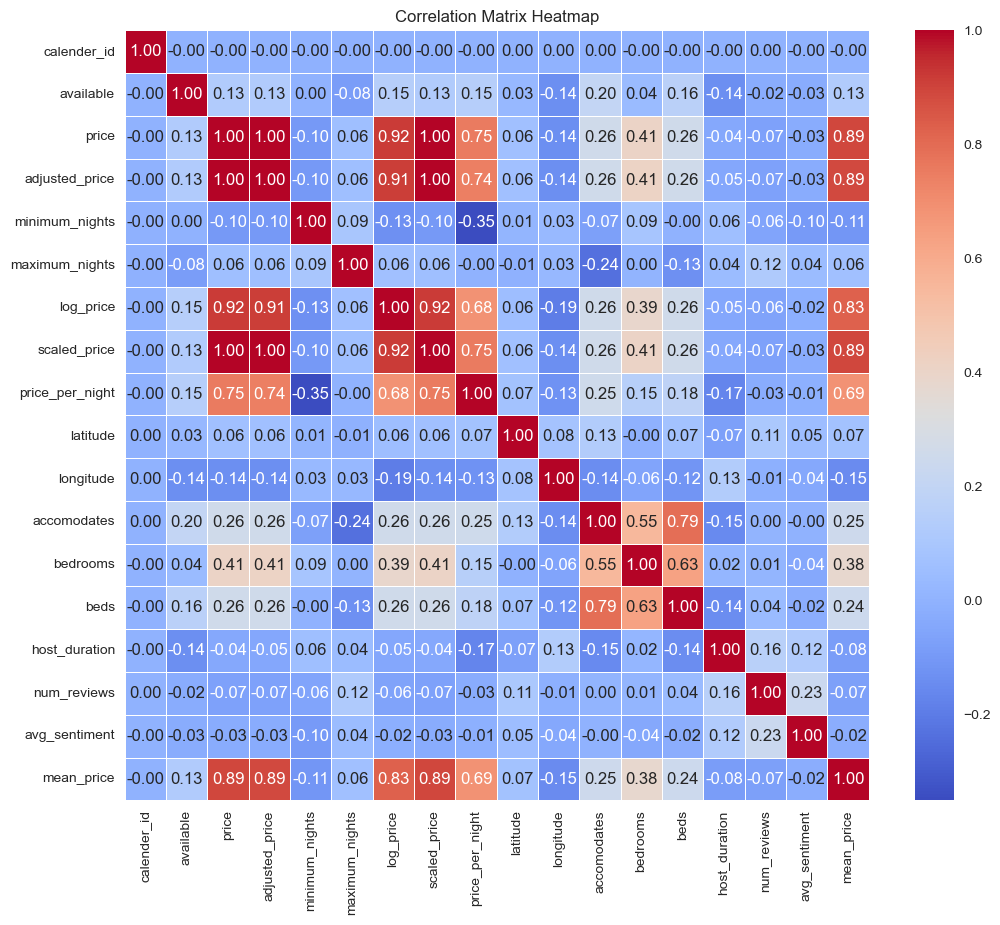

In [247]:
plt.figure(figsize=(12, 10))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt=".2f", linewidths=.5)
plt.title('Correlation Matrix Heatmap')
plt.show()

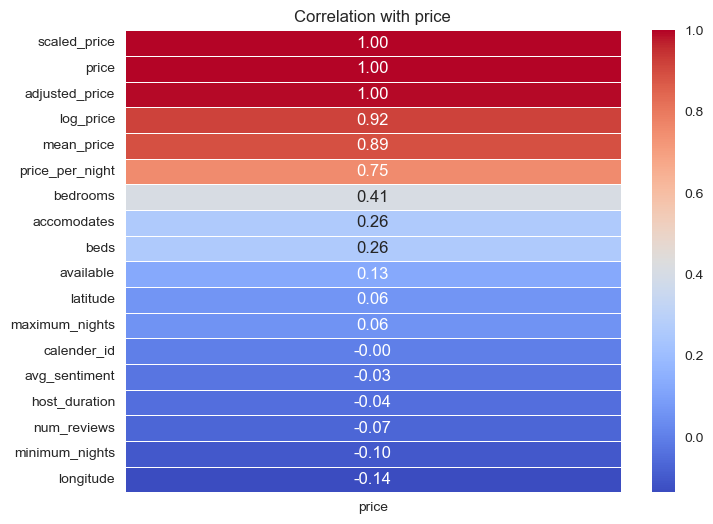

In [248]:
plt.figure(figsize=(8, 6))
sns.heatmap(correlation_matrix[[target_variable]].sort_values(by=target_variable, ascending=False), 
            annot=True, cmap='coolwarm', fmt=".2f", linewidths=.5)
plt.title(f'Correlation with {target_variable}')
plt.show()

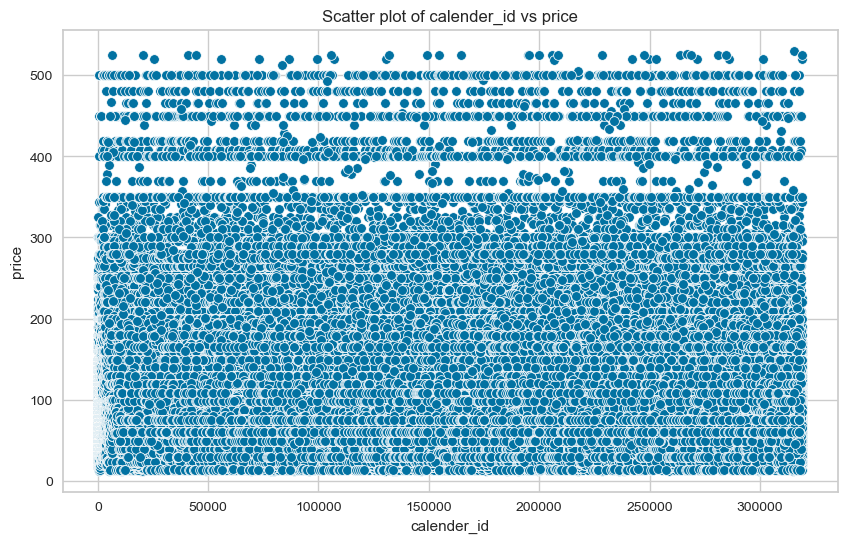

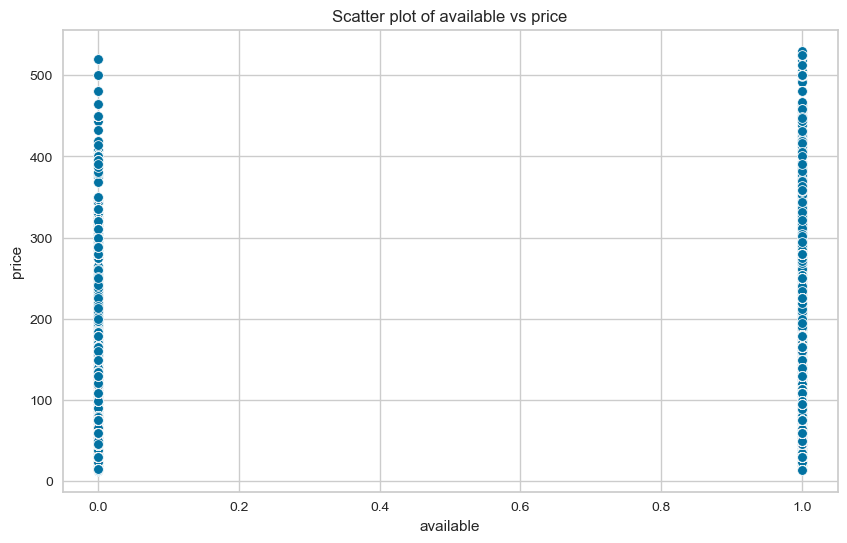

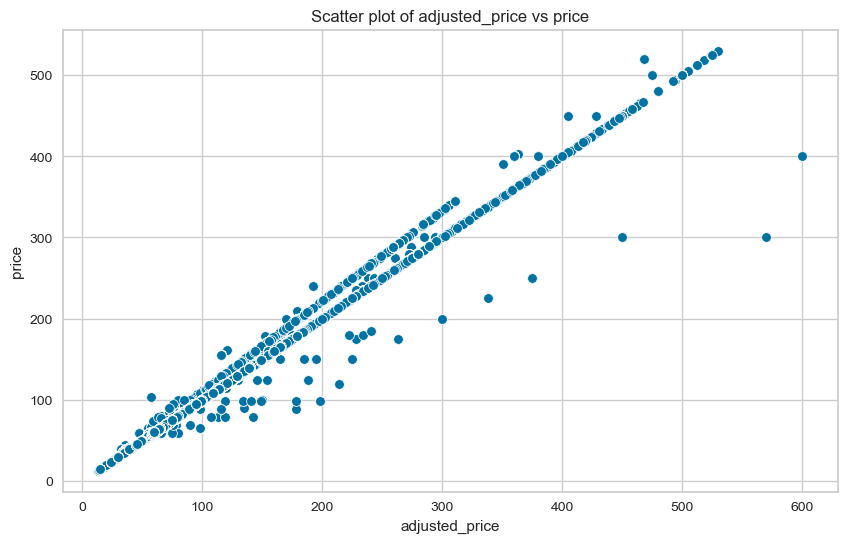

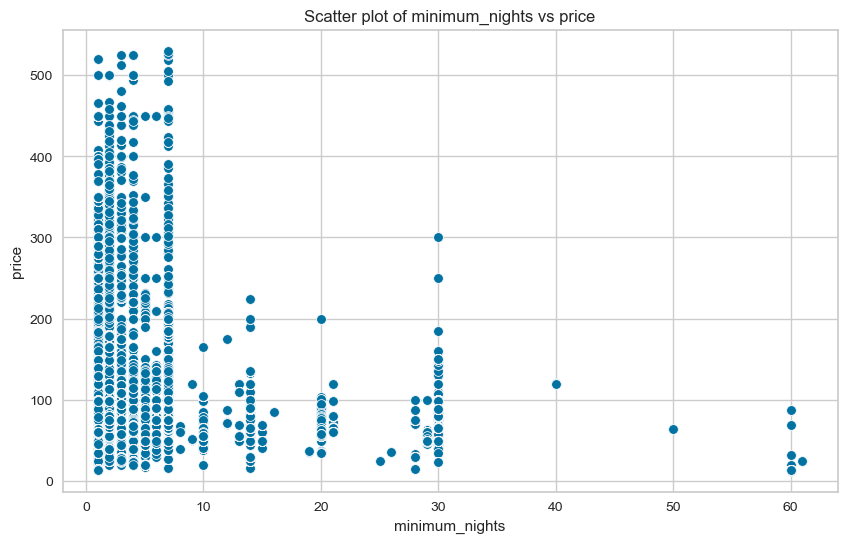

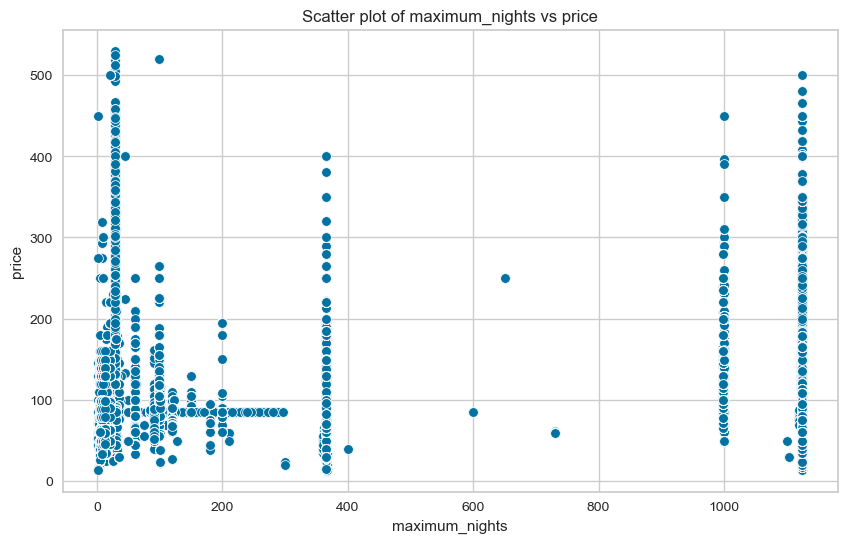

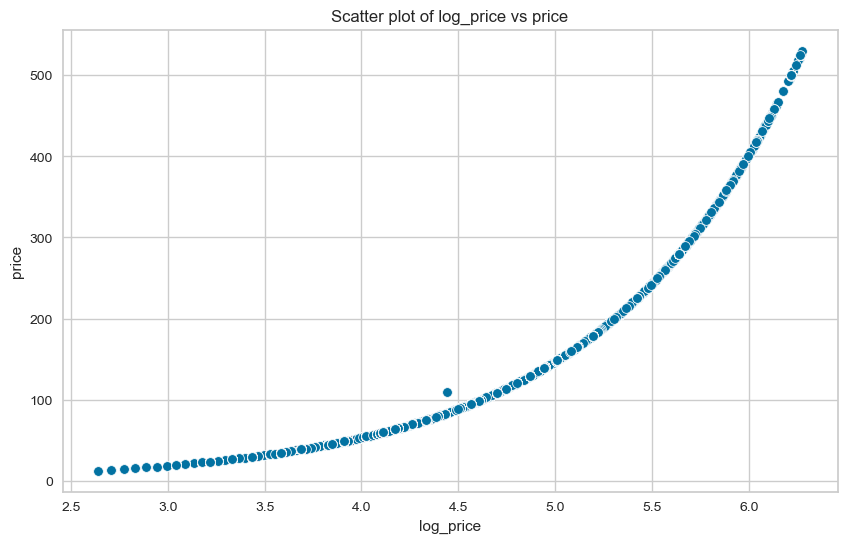

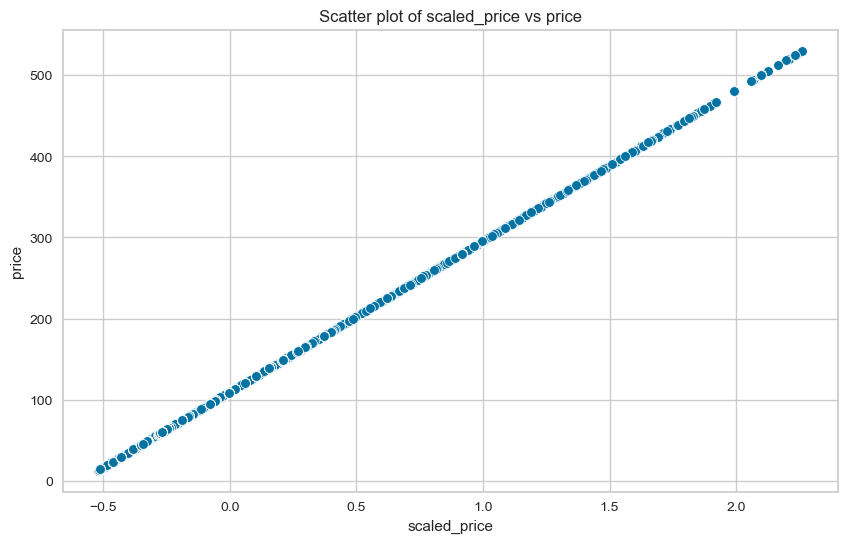

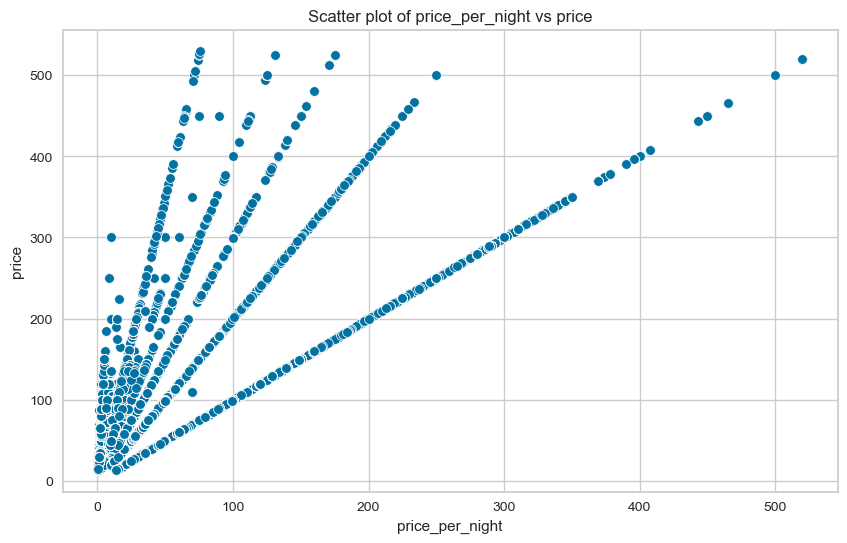

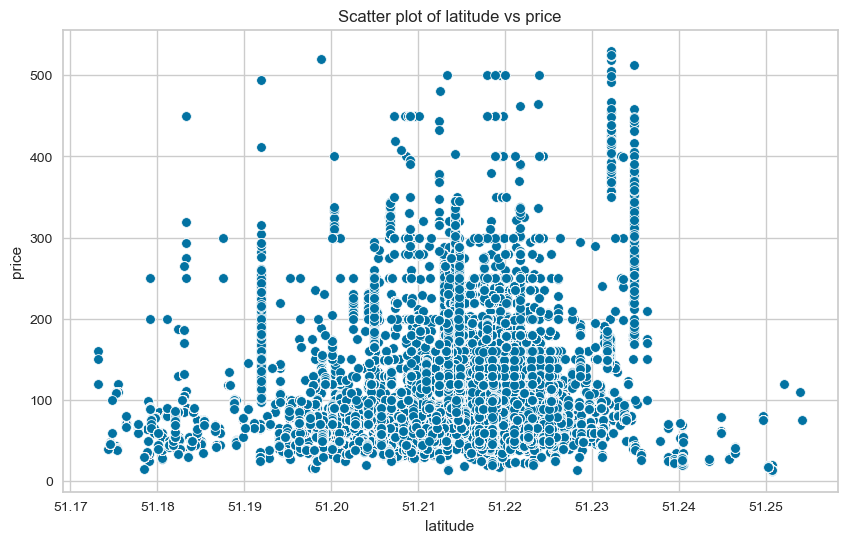

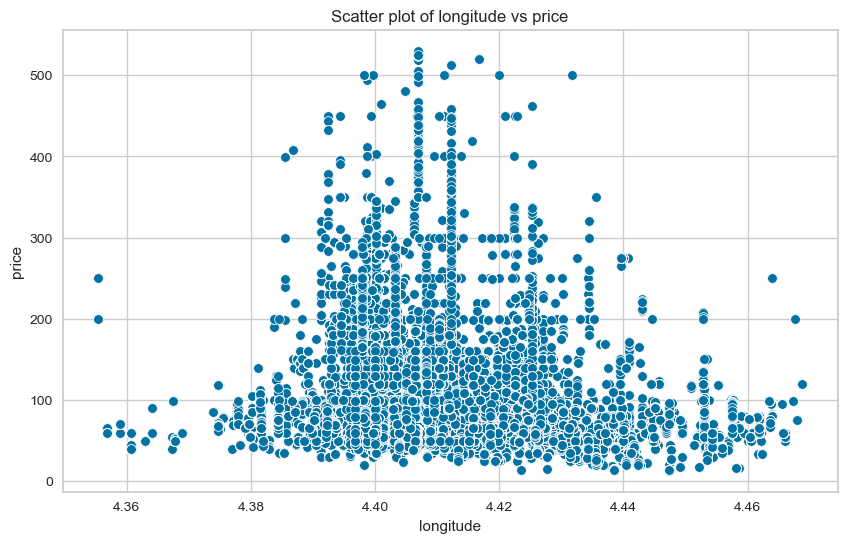

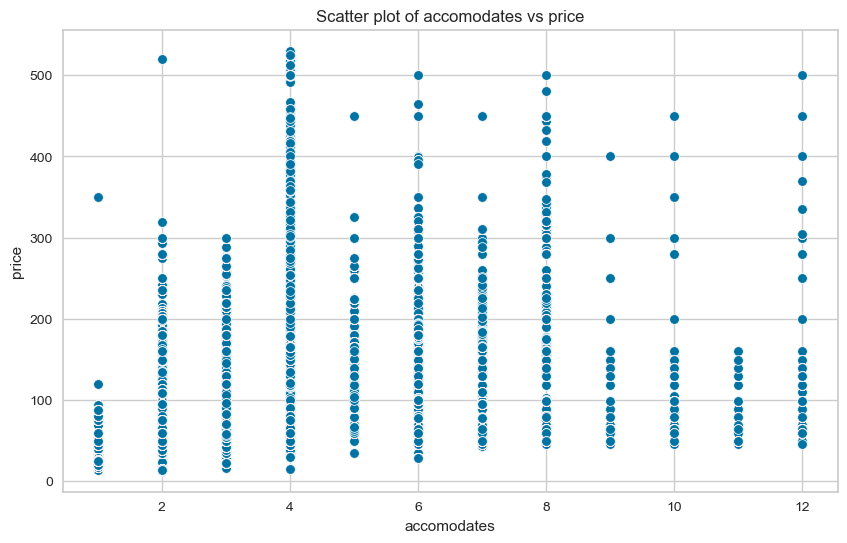

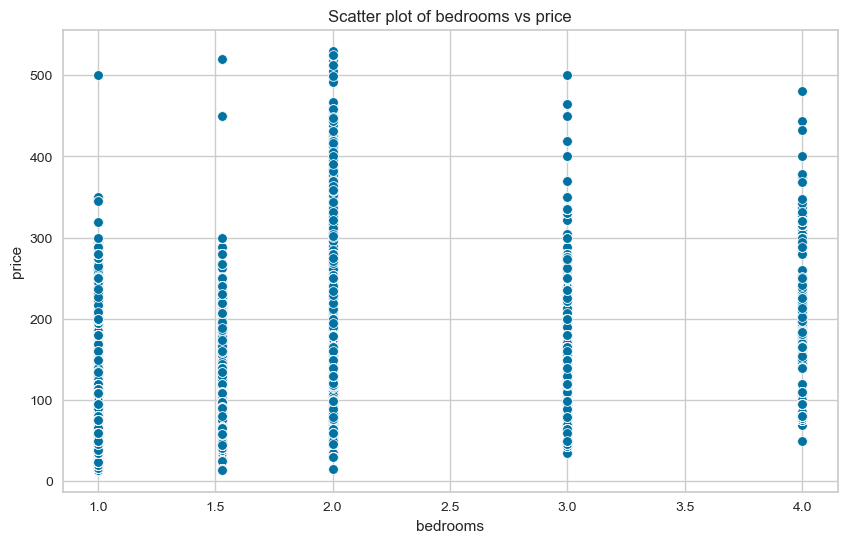

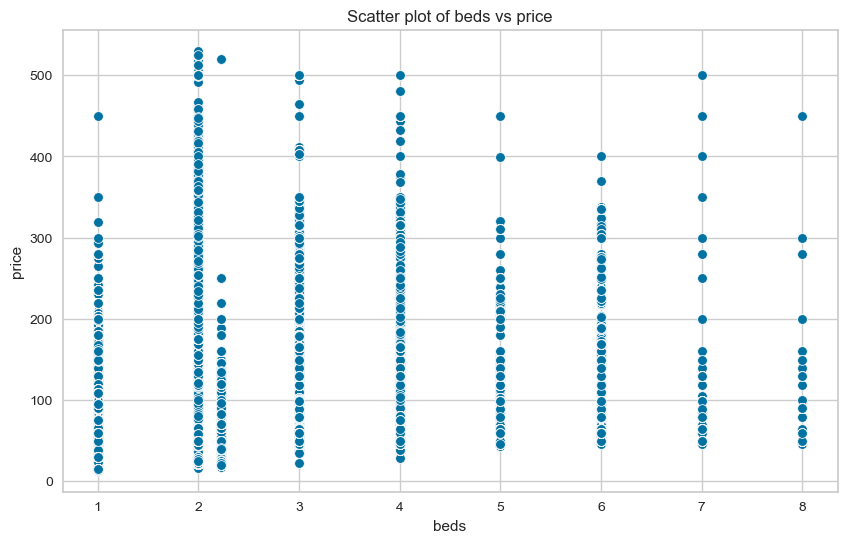

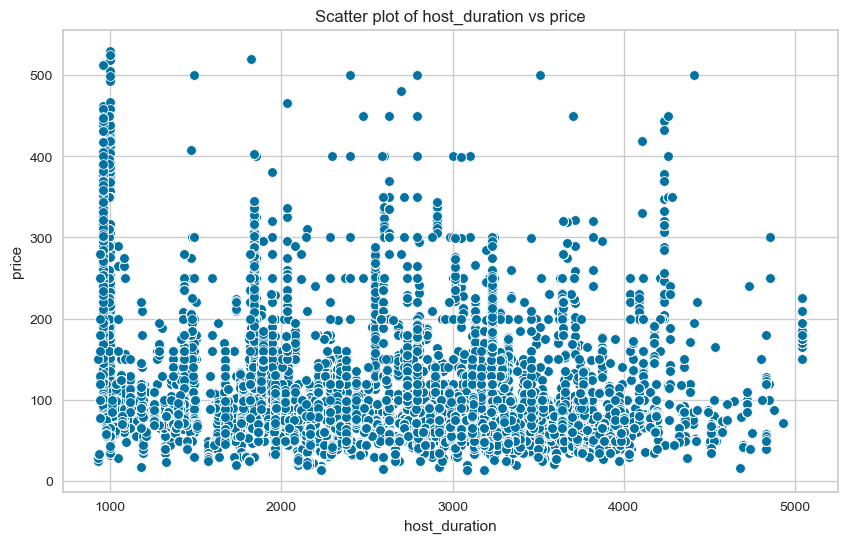

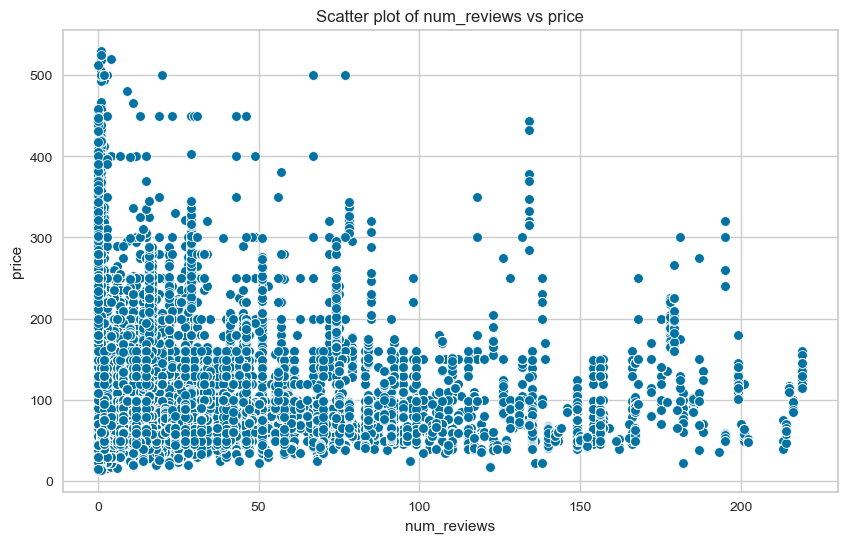

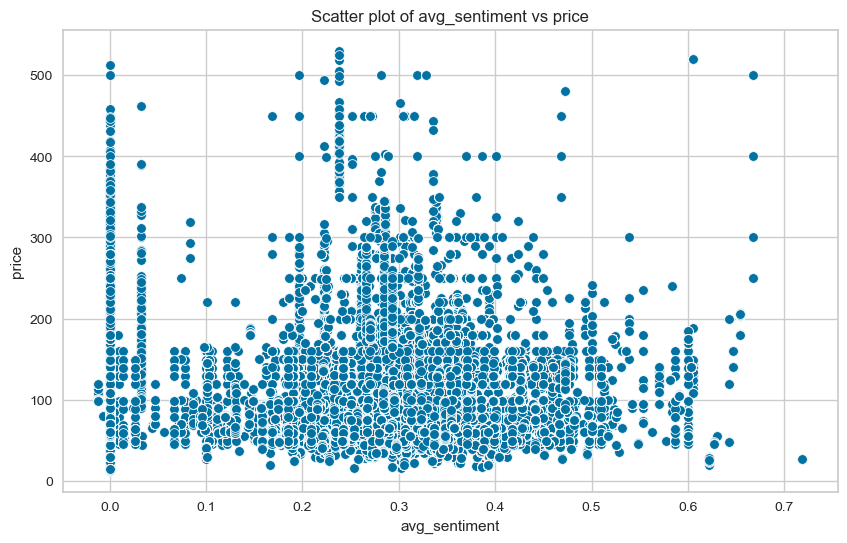

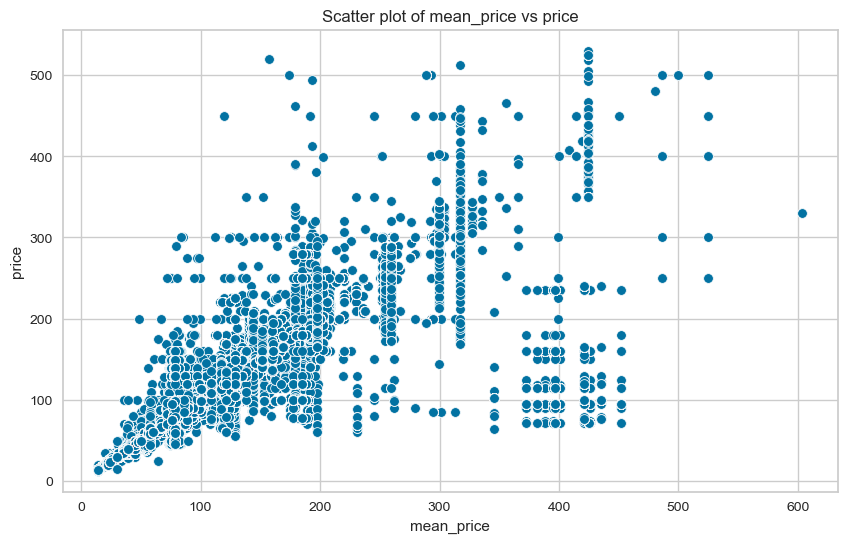

In [249]:
for column in numeric_columns:
    if column != target_variable:
        plt.figure(figsize=(10, 6))
        sns.scatterplot(data=df_concatenated, x=column, y=target_variable)
        plt.title(f'Scatter plot of {column} vs {target_variable}')
        plt.show()

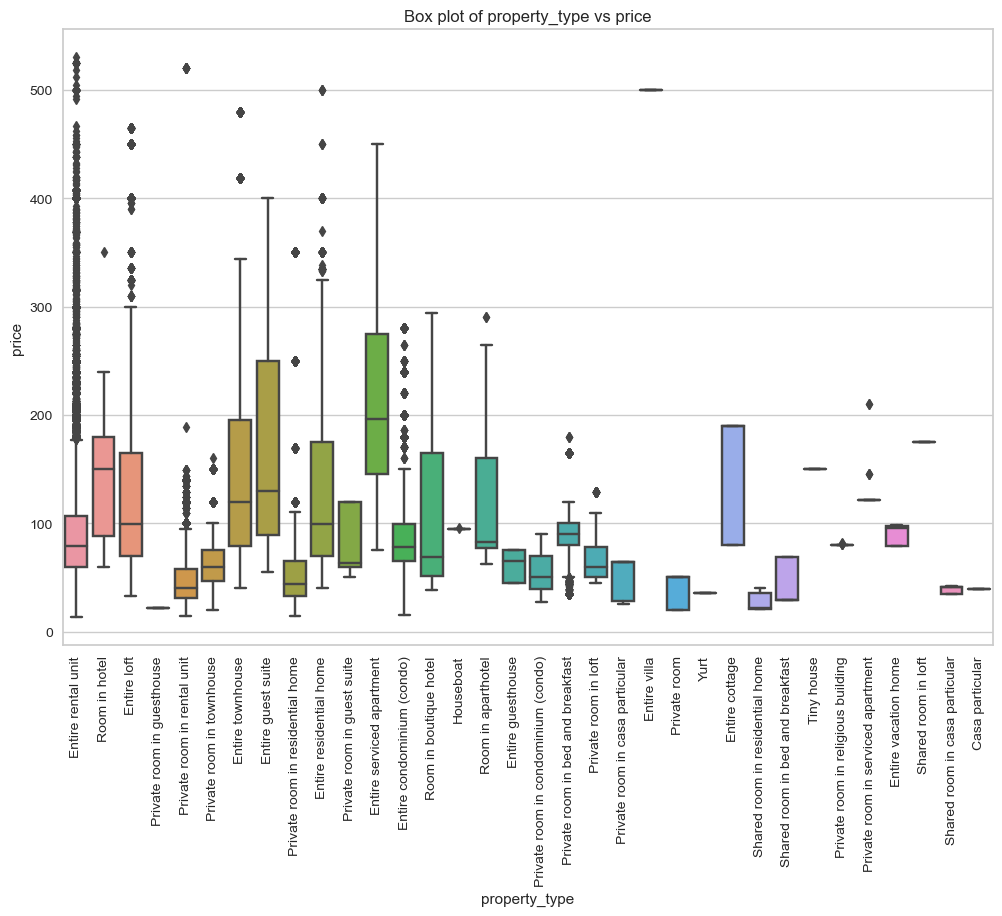

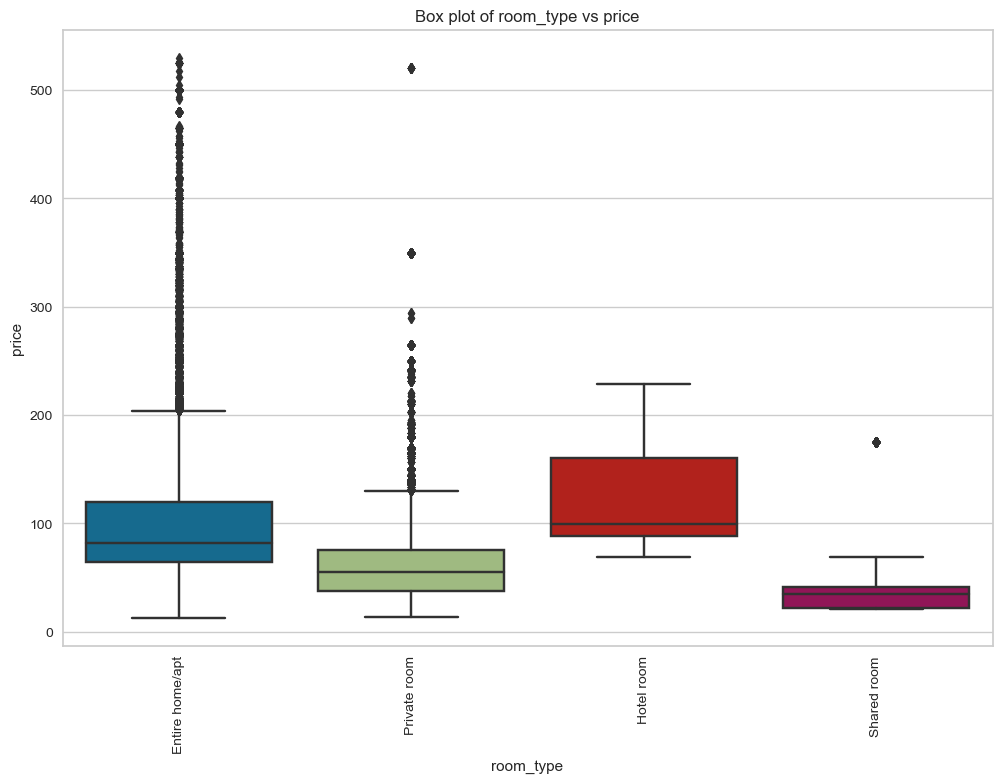

In [250]:
categorical_columns = ['property_type', 'room_type']

for column in categorical_columns:
    plt.figure(figsize=(12, 8))
    sns.boxplot(data=df_concatenated, x=column, y=target_variable)
    plt.xticks(rotation=90)
    plt.title(f'Box plot of {column} vs {target_variable}')
    plt.show()

In [251]:
df_concatenated.columns

Index(['calender_id', 'listing_id', 'date', 'available', 'price',
       'adjusted_price', 'minimum_nights', 'maximum_nights', 'log_price',
       'scaled_price', 'price_per_night', 'listing_url', 'name', 'description',
       'latitude', 'longitude', 'property_type', 'room_type', 'accomodates',
       'bathrooms_text', 'bedrooms', 'beds', 'amenities', 'host_id', 'region',
       'property_type_Boat', 'property_type_Casa particular',
       'property_type_Castle', 'property_type_Entire condominium (condo)',
       'property_type_Entire cottage', 'property_type_Entire guest suite',
       'property_type_Entire guesthouse', 'property_type_Entire loft',
       'property_type_Entire rental unit',
       'property_type_Entire residential home',
       'property_type_Entire serviced apartment',
       'property_type_Entire townhouse', 'property_type_Entire vacation home',
       'property_type_Entire villa', 'property_type_Houseboat',
       'property_type_Private room',
       'property_typ

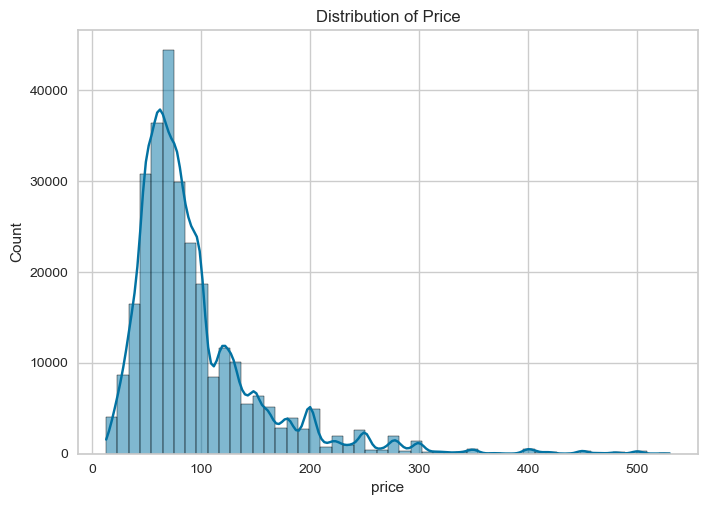

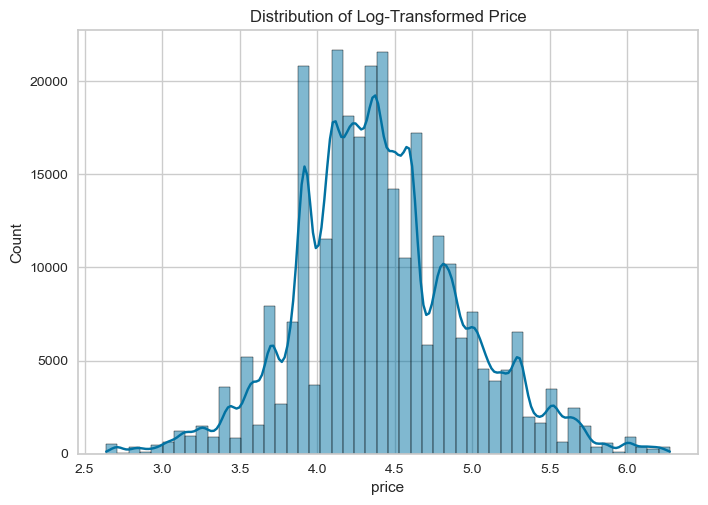

In [252]:
sns.histplot(df_concatenated['price'], bins=50, kde=True)
plt.title('Distribution of Price')
plt.show()

# Check the distribution of log-transformed price
sns.histplot(np.log1p(df_concatenated['price']), bins=50, kde=True)
plt.title('Distribution of Log-Transformed Price')
plt.show()

As the price varaible is skewed we can take log_price variable as target variable.

Modelling and insights (Task 2)

• Explain your approach on creating train/test/validation splits.
• Create a comparison matrix to compare different regression models you've run
• Experiment with Linear Regression, Regression Trees, Random Forest Regressor and
GBM. Not compulsory but you can also experiment with Xgboost, Lightgbm
• Explain which model you've finalized and why you finalize the model.
• Explain what the top 5 most important predictors are and also explain the direction of
impact of these top 5 predictors on the response variable.

In [253]:
df_concatenated.head()

,calender_id,listing_id,date,available,price,adjusted_price,minimum_nights,maximum_nights,log_price,scaled_price,...,property_type_Tiny house,property_type_Yurt,room_type_Entire home/apt,room_type_Hotel room,room_type_Private room,room_type_Shared room,host_duration,num_reviews,avg_sentiment,mean_price
0,1,40334325,2022-08-03,0,56.0,56.0,3,5,4.043051,-0.290207,...,0,0,1,0,0,0,1688,1.0,0.033333,56.0
1,2109,40334325,2022-02-14,1,56.0,56.0,3,5,4.043051,-0.290207,...,0,0,1,0,0,0,1688,1.0,0.033333,56.0
2,3617,40334325,2022-04-26,0,56.0,56.0,3,5,4.043051,-0.290207,...,0,0,1,0,0,0,1688,1.0,0.033333,56.0
3,5560,40334325,2022-04-08,0,56.0,56.0,3,5,4.043051,-0.290207,...,0,0,1,0,0,0,1688,1.0,0.033333,56.0
4,8188,40334325,2022-04-11,0,56.0,56.0,3,5,4.043051,-0.290207,...,0,0,1,0,0,0,1688,1.0,0.033333,56.0


In [254]:
target_variable = 'log_price'

In [255]:
df_concatenated.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 288199 entries, 0 to 319191
Data columns (total 72 columns):
 #   Column                                             Non-Null Count   Dtype         
---  ------                                             --------------   -----         
 0   calender_id                                        288199 non-null  int64         
 1   listing_id                                         288199 non-null  int64         
 2   date                                               288199 non-null  datetime64[ns]
 3   available                                          288199 non-null  int64         
 4   price                                              288199 non-null  float64       
 5   adjusted_price                                     288199 non-null  float64       
 6   minimum_nights                                     288199 non-null  int64         
 7   maximum_nights                                     288199 non-null  int64         
 8   log_

In [256]:
boolean_columns = df_concatenated.select_dtypes(include=['bool']).columns
df_concatenated[boolean_columns] = df_concatenated[boolean_columns].astype(int)
df_concatenated

,calender_id,listing_id,date,available,price,adjusted_price,minimum_nights,maximum_nights,log_price,scaled_price,...,property_type_Tiny house,property_type_Yurt,room_type_Entire home/apt,room_type_Hotel room,room_type_Private room,room_type_Shared room,host_duration,num_reviews,avg_sentiment,mean_price
0,1,40334325,2022-08-03,0,56.0,56.0,3,5,4.043051,-0.290207,...,0,0,1,0,0,0,1688,1.0,0.033333,56.000000
1,2109,40334325,2022-02-14,1,56.0,56.0,3,5,4.043051,-0.290207,...,0,0,1,0,0,0,1688,1.0,0.033333,56.000000
2,3617,40334325,2022-04-26,0,56.0,56.0,3,5,4.043051,-0.290207,...,0,0,1,0,0,0,1688,1.0,0.033333,56.000000
3,5560,40334325,2022-04-08,0,56.0,56.0,3,5,4.043051,-0.290207,...,0,0,1,0,0,0,1688,1.0,0.033333,56.000000
4,8188,40334325,2022-04-11,0,56.0,56.0,3,5,4.043051,-0.290207,...,0,0,1,0,0,0,1688,1.0,0.033333,56.000000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
319187,303596,52592822,2022-04-10,0,30.0,30.0,28,365,3.433987,-0.430149,...,0,0,1,0,0,0,2596,0.0,0.000000,29.836066
319188,304185,52592822,2022-08-01,1,30.0,30.0,28,365,3.433987,-0.430149,...,0,0,1,0,0,0,2596,0.0,0.000000,29.836066
319189,309445,52592822,2022-12-20,0,30.0,30.0,28,365,3.433987,-0.430149,...,0,0,1,0,0,0,2596,0.0,0.000000,29.836066
319190,312828,52592822,2022-07-17,1,30.0,30.0,28,365,3.433987,-0.430149,...,0,0,1,0,0,0,2596,0.0,0.000000,29.836066


In [257]:
df_main =df_concatenated.copy()

In [258]:
df_main.head()

,calender_id,listing_id,date,available,price,adjusted_price,minimum_nights,maximum_nights,log_price,scaled_price,...,property_type_Tiny house,property_type_Yurt,room_type_Entire home/apt,room_type_Hotel room,room_type_Private room,room_type_Shared room,host_duration,num_reviews,avg_sentiment,mean_price
0,1,40334325,2022-08-03,0,56.0,56.0,3,5,4.043051,-0.290207,...,0,0,1,0,0,0,1688,1.0,0.033333,56.0
1,2109,40334325,2022-02-14,1,56.0,56.0,3,5,4.043051,-0.290207,...,0,0,1,0,0,0,1688,1.0,0.033333,56.0
2,3617,40334325,2022-04-26,0,56.0,56.0,3,5,4.043051,-0.290207,...,0,0,1,0,0,0,1688,1.0,0.033333,56.0
3,5560,40334325,2022-04-08,0,56.0,56.0,3,5,4.043051,-0.290207,...,0,0,1,0,0,0,1688,1.0,0.033333,56.0
4,8188,40334325,2022-04-11,0,56.0,56.0,3,5,4.043051,-0.290207,...,0,0,1,0,0,0,1688,1.0,0.033333,56.0


In [259]:
df_main = df_main.drop(columns=['calender_id','listing_id','date','amenities','listing_url','name','host_id','description','property_type','room_type'])
df_main

,available,price,adjusted_price,minimum_nights,maximum_nights,log_price,scaled_price,price_per_night,latitude,longitude,...,property_type_Tiny house,property_type_Yurt,room_type_Entire home/apt,room_type_Hotel room,room_type_Private room,room_type_Shared room,host_duration,num_reviews,avg_sentiment,mean_price
0,0,56.0,56.0,3,5,4.043051,-0.290207,18.666667,51.20989,4.42298,...,0,0,1,0,0,0,1688,1.0,0.033333,56.000000
1,1,56.0,56.0,3,5,4.043051,-0.290207,18.666667,51.20989,4.42298,...,0,0,1,0,0,0,1688,1.0,0.033333,56.000000
2,0,56.0,56.0,3,5,4.043051,-0.290207,18.666667,51.20989,4.42298,...,0,0,1,0,0,0,1688,1.0,0.033333,56.000000
3,0,56.0,56.0,3,5,4.043051,-0.290207,18.666667,51.20989,4.42298,...,0,0,1,0,0,0,1688,1.0,0.033333,56.000000
4,0,56.0,56.0,3,5,4.043051,-0.290207,18.666667,51.20989,4.42298,...,0,0,1,0,0,0,1688,1.0,0.033333,56.000000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
319187,0,30.0,30.0,28,365,3.433987,-0.430149,1.071429,51.17848,4.42773,...,0,0,1,0,0,0,2596,0.0,0.000000,29.836066
319188,1,30.0,30.0,28,365,3.433987,-0.430149,1.071429,51.17848,4.42773,...,0,0,1,0,0,0,2596,0.0,0.000000,29.836066
319189,0,30.0,30.0,28,365,3.433987,-0.430149,1.071429,51.17848,4.42773,...,0,0,1,0,0,0,2596,0.0,0.000000,29.836066
319190,1,30.0,30.0,28,365,3.433987,-0.430149,1.071429,51.17848,4.42773,...,0,0,1,0,0,0,2596,0.0,0.000000,29.836066


In [260]:
df_main['bathrooms_text'] = df_main['bathrooms_text'].str.extract('(\d+)').astype(float)
df_main['bathrooms_text']

0         1.0
1         1.0
2         1.0
3         1.0
4         1.0
         ... 
319187    1.0
319188    1.0
319189    1.0
319190    1.0
319191    1.0
Name: bathrooms_text, Length: 288199, dtype: float64

In [261]:
predictor_variables = df_main.columns.difference([target_variable, 'price', 'scaled_price','adjusted_price','mean_price'])
predictor_variables

Index(['accomodates', 'available', 'avg_sentiment', 'bathrooms_text',
       'bedrooms', 'beds', 'host_duration', 'latitude', 'longitude',
       'maximum_nights', 'minimum_nights', 'num_reviews', 'price_per_night',
       'property_type_Boat', 'property_type_Casa particular',
       'property_type_Castle', 'property_type_Entire condominium (condo)',
       'property_type_Entire cottage', 'property_type_Entire guest suite',
       'property_type_Entire guesthouse', 'property_type_Entire loft',
       'property_type_Entire rental unit',
       'property_type_Entire residential home',
       'property_type_Entire serviced apartment',
       'property_type_Entire townhouse', 'property_type_Entire vacation home',
       'property_type_Entire villa', 'property_type_Houseboat',
       'property_type_Private room',
       'property_type_Private room in bed and breakfast',
       'property_type_Private room in boat',
       'property_type_Private room in casa particular',
       'property_type

In [262]:
df_main.select_dtypes(include=['object']).columns

Index([], dtype='object')

In [263]:
numerical_columns = df_main.select_dtypes(include=['number']).columns
df_main[numerical_columns] = df_main[numerical_columns].fillna(df_main[numerical_columns].median())

In [264]:
X = df_main[predictor_variables]
y = df_main[target_variable]

In [265]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)


In [266]:
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

In [267]:
model_LR = LinearRegression()
model_LR.fit(X_train_scaled, y_train)

LinearRegression()

In [268]:
y_pred_LR = model_LR.predict(X_test)

In [269]:
print('Linear Regression')
mse = mean_squared_error(y_test, y_pred_LR)
print(f'Mean Squared Error: {mse}')

r2 = r2_score(y_test, y_pred_LR)
print(f'R-squared: {r2}')

mae = mean_absolute_error(y_test, y_pred_LR)
print(f'Mean Absolute Error: {mae}')

rmse = np.sqrt(mean_squared_error(y_test, y_pred_LR))
print(f'Root Mean Squared Error: {rmse}')

Linear Regression
Mean Squared Error: 1.902922671652099e+23
R-squared: -6.656462309363618e+23
Mean Absolute Error: 428038340621.12396
Root Mean Squared Error: 436225018958.3467


Analysis - 

1) Poor Model Performance: The extremely large values of MSE, R-squared (negative), MAE, and RMSE indicate severe issues with the model's predictive capability.

2) Possible Causes: These issues could stem from various factors such as overfitting (model too complex), underfitting (model too simple), incorrect assumptions about the data, or outliers influencing the model disproportionately.

Recommendation - 

1) It is crucial to revisit the model selection, feature engineering, and data preprocessing steps. Consider using regularization techniques, cross-validation, or different model algorithms to improve model performance.

In [270]:
tree_model = DecisionTreeRegressor(random_state=42)
tree_model.fit(X_train, y_train)

# Predict and evaluate
y_pred_tree = tree_model.predict(X_test)


In [271]:
print('Regression Tree')
print(f'MSE: {mean_squared_error(y_test, y_pred_tree)}')
print(f'R-squared: {r2_score(y_test, y_pred_tree)}')
print(f'MAE: {mean_absolute_error(y_test, y_pred_tree)}')
print(f'RMSE: {np.sqrt(mean_squared_error(y_test, y_pred_tree))}\n')

Regression Tree
MSE: 3.073841479737342e-05
R-squared: 0.9998924763982286
MAE: 8.732314743917451e-05
RMSE: 0.005544223552254492



Analysis - 

1) High Accuracy: The regression tree model demonstrates exceptional accuracy with very low values for MSE, MAE, and RMSE, indicating precise prediction capabilities.

2) Excellent Fit: The R-squared value near 1 (99.99%) indicates that the model captures almost all variability in the target variable, suggesting an excellent fit to the data.

3) Reliability: These metrics collectively suggest that the regression tree model is robust and reliable for making predictions based on the given dataset.

In [272]:
rf_model = RandomForestRegressor(random_state=42)
rf_model.fit(X_train, y_train)

RandomForestRegressor(random_state=42)

In [273]:
# Predict and evaluate
y_pred_rf = rf_model.predict(X_test)
print('Random Forest Regressor')
print(f'MSE: {mean_squared_error(y_test, y_pred_rf)}')
print(f'R-squared: {r2_score(y_test, y_pred_rf)}')
print(f'MAE: {mean_absolute_error(y_test, y_pred_rf)}')
print(f'RMSE: {np.sqrt(mean_squared_error(y_test, y_pred_rf))}\n')

Random Forest Regressor
MSE: 3.294499024043784e-05
R-squared: 0.9998847577523329
MAE: 0.00011119442371771302
RMSE: 0.00573977266452582



Finding - 

1) High Accuracy: The Random Forest Regressor demonstrates exceptional accuracy with very low values for MSE, MAE, and RMSE, indicating precise prediction capabilities.

2) Excellent Fit: The R-squared value near 1 (99.99%) indicates that the model captures almost all variability in the target variable, suggesting an excellent fit to the data.

3) Reliability: These metrics collectively suggest that the Random Forest Regressor is robust and reliable for making predictions based on the given dataset.

In [274]:
gbm_model = GradientBoostingRegressor(random_state=42)
gbm_model.fit(X_train, y_train)

GradientBoostingRegressor(random_state=42)

In [275]:
# Predict and evaluate
y_pred_gbm = gbm_model.predict(X_test)
print('Gradient Boosting Regressor')
print(f'MSE: {mean_squared_error(y_test, y_pred_gbm)}')
print(f'R-squared: {r2_score(y_test, y_pred_gbm)}')
print(f'MAE: {mean_absolute_error(y_test, y_pred_gbm)}')
print(f'RMSE: {np.sqrt(mean_squared_error(y_test, y_pred_gbm))}\n')

Gradient Boosting Regressor
MSE: 0.004460799352953873
R-squared: 0.9843960328998593
MAE: 0.04337986027963428
RMSE: 0.0667892158432323



Findings -

1) Good Performance: The Gradient Boosting Regressor demonstrates good performance across the board, with reasonably low values for MSE, MAE, and RMSE.

2) High R-squared: The high R-squared value (98.43%) indicates that the model captures a significant portion of the variance in the target variable, suggesting a strong fit to the data.

3) Interpretation: These metrics collectively indicate that the Gradient Boosting Regressor is effective in predicting the target variable, providing accurate and reliable predictions based on the given dataset.

In [276]:
xgb_model = XGBRegressor(random_state=42)
xgb_model.fit(X_train, y_train)

XGBRegressor(base_score=None, booster=None, callbacks=None,
             colsample_bylevel=None, colsample_bynode=None,
             colsample_bytree=None, device=None, early_stopping_rounds=None,
             enable_categorical=False, eval_metric=None, feature_types=None,
             gamma=None, grow_policy=None, importance_type=None,
             interaction_constraints=None, learning_rate=None, max_bin=None,
             max_cat_threshold=None, max_cat_to_onehot=None,
             max_delta_step=None, max_depth=None, max_leaves=None,
             min_child_weight=None, missing=nan, monotone_constraints=None,
             multi_strategy=None, n_estimators=None, n_jobs=None,
             num_parallel_tree=None, random_state=42, ...)

In [277]:
# Predict and evaluate
y_pred_xgb = xgb_model.predict(X_test)
print('XGBoost Regressor')
print(f'MSE: {mean_squared_error(y_test, y_pred_xgb)}')
print(f'R-squared: {r2_score(y_test, y_pred_xgb)}')
print(f'MAE: {mean_absolute_error(y_test, y_pred_xgb)}')
print(f'RMSE: {np.sqrt(mean_squared_error(y_test, y_pred_xgb))}\n')

XGBoost Regressor
MSE: 9.708069018396388e-05
R-squared: 0.9996604097660913
MAE: 0.004376564510868828
RMSE: 0.009852953373682628



Findings - 

1) High Accuracy: The XGBoost Regressor demonstrates exceptional accuracy with very low values for MSE, MAE, and RMSE, indicating precise prediction capabilities.

2) Excellent Fit: The high R-squared value (99.97%) indicates that the model captures almost all variability in the target variable, suggesting an excellent fit to the data.

3) Reliability: These metrics collectively suggest that the XGBoost Regressor is robust and reliable for making predictions based on the given dataset.

In [278]:
lgb_model = LGBMRegressor(random_state=42)
lgb_model.fit(X_train, y_train)

[LightGBM] [Warning] Found whitespace in feature_names, replace with underlines
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.006303 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 1674
[LightGBM] [Info] Number of data points in the train set: 230559, number of used features: 52
[LightGBM] [Info] Start training from score 4.402355


LGBMRegressor(random_state=42)

In [279]:
# Predict and evaluate
y_pred_lgb = lgb_model.predict(X_test)
print('LightGBM Regressor')
print(f'MSE: {mean_squared_error(y_test, y_pred_lgb)}')
print(f'R-squared: {r2_score(y_test, y_pred_lgb)}')
print(f'MAE: {mean_absolute_error(y_test, y_pred_lgb)}')
print(f'RMSE: {np.sqrt(mean_squared_error(y_test, y_pred_lgb))}\n')

LightGBM Regressor
MSE: 0.00027608490059135096
R-squared: 0.999034249387877
MAE: 0.01040148738386571
RMSE: 0.016615802736893302



Findings - 

1) Strong Performance: The LightGBM Regressor demonstrates strong performance across the board, with low values for MSE, MAE, and RMSE.

2) High R-squared: The high R-squared value (99.89%) indicates that the model captures a significant portion of the variance in the target variable, suggesting a strong fit to the data.

3) Efficiency: LightGBM is known for its efficiency in training and predicting, making it suitable for large-scale datasets and complex models.

Random Forest Regressor is selected due to its excellent performance and robustness from above analysis. 

In [280]:
from pycaret.regression import *

In [281]:
exp_reg = setup(data = df_main, target = 'log_price', session_id = 123)

,Description,Value
0,Session id,123
1,Target,log_price
2,Target type,Regression
3,Original data shape,"(288199, 62)"
4,Transformed data shape,"(288199, 62)"
5,Transformed train set shape,"(201739, 62)"
6,Transformed test set shape,"(86460, 62)"
7,Numeric features,61
8,Preprocess,True
9,Imputation type,simple


In [282]:
best_model = compare_models()

,Model,MAE,MSE,RMSE,R2,RMSLE,MAPE,TT (Sec)
dt,Decision Tree Regressor,0.0000,0.0000,0.0001,1.0000,0.0000,0.0000,0.4210
gbr,Gradient Boosting Regressor,0.0013,0.0000,0.0037,1.0000,0.0007,0.0003,12.8880
lightgbm,Light Gradient Boosting Machine,0.0001,0.0000,0.0008,1.0000,0.0001,0.0000,1.1860
xgboost,Extreme Gradient Boosting,0.0007,0.0000,0.0024,1.0000,0.0005,0.0002,1.1510
rf,Random Forest Regressor,0.0000,0.0000,0.0002,1.0000,0.0000,0.0000,15.0220
et,Extra Trees Regressor,0.0000,0.0000,0.0004,1.0000,0.0001,0.0000,18.0040
knn,K Neighbors Regressor,0.0009,0.0001,0.0099,0.9997,0.0018,0.0002,7.4260
ada,AdaBoost Regressor,0.0310,0.0015,0.0388,0.9947,0.0075,0.0073,15.1730
lr,Linear Regression,0.1238,0.0297,0.1723,0.8961,0.0323,0.0291,0.8470
br,Bayesian Ridge,0.1247,0.0301,0.1735,0.8947,0.0324,0.0292,0.6450


In [283]:
from sklearn.model_selection import cross_val_score
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import GradientBoostingRegressor, RandomForestRegressor, ExtraTreesRegressor
from xgboost import XGBRegressor
from lightgbm import LGBMRegressor

# Define models
models = {
    'Decision Tree': DecisionTreeRegressor(),
    'Gradient Boosting': GradientBoostingRegressor(),
    'Random Forest': RandomForestRegressor(),
    'Extra Trees': ExtraTreesRegressor(),
    'XGBoost': XGBRegressor(),
    'LightGBM': LGBMRegressor()
}

# Evaluate each model
results = {}
for model_name, model in models.items():
    # Using cross-validation to get the mean R2 score
    cv_results = cross_val_score(model, X, y, cv=5, scoring='r2')
    results[model_name] = cv_results.mean()

# Display results
for model_name, score in results.items():
    print(f"{model_name}: R2 Score = {score:.4f}")

# Select the best model based on R2 score
best_model_name = max(results, key=results.get)
best_model = models[best_model_name]

print(f"Best Model: {best_model_name} with R2 Score: {results[best_model_name]:.4f}")


[LightGBM] [Warning] Found whitespace in feature_names, replace with underlines
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.009640 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 1622
[LightGBM] [Info] Number of data points in the train set: 230559, number of used features: 51
[LightGBM] [Info] Start training from score 4.397488
[LightGBM] [Warning] Found whitespace in feature_names, replace with underlines
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.007359 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 1663
[LightGBM] [Info] Number of data points in the train set: 230559, number of used features: 49
[LightGBM] [Info] Start training from score 4.414826
[LightGBM] [Warning] Found

In [284]:
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Fit the best model
best_model.fit(X_train, y_train)


# Make predictions
y_pred = best_model.predict(X_test)

# Evaluate performance
mse = mean_squared_error(y_test, y_pred)
mae = mean_absolute_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)

print(f"Performance of the Best Model ({best_model_name}):")
print(f"Mean Squared Error: {mse:.4f}")
print(f"Mean Absolute Error: {mae:.4f}")
print(f"R2 Score: {r2:.4f}")


[LightGBM] [Warning] Found whitespace in feature_names, replace with underlines
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.008615 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 1679
[LightGBM] [Info] Number of data points in the train set: 230559, number of used features: 52
[LightGBM] [Info] Start training from score 4.402355
Performance of the Best Model (LightGBM):
Mean Squared Error: 0.0003
Mean Absolute Error: 0.0106
R2 Score: 0.9990


In [285]:
from sklearn.ensemble import VotingRegressor

# Create a voting regressor with the best-performing models
ensemble_model = VotingRegressor(estimators=[
    ('dt', DecisionTreeRegressor()),
    ('gbr', GradientBoostingRegressor()),
    ('rf', RandomForestRegressor())
])

# Fit the ensemble model
ensemble_model.fit(X_train, y_train)

# Evaluate the ensemble model
y_pred_ensemble = ensemble_model.predict(X_test)

# Calculate performance metrics
mse_ensemble = mean_squared_error(y_test, y_pred_ensemble)
mae_ensemble = mean_absolute_error(y_test, y_pred_ensemble)
r2_ensemble = r2_score(y_test, y_pred_ensemble)

print(f"Performance of the Ensemble Model:")
print(f"Mean Squared Error: {mse_ensemble:.4f}")
print(f"Mean Absolute Error: {mae_ensemble:.4f}")
print(f"R2 Score: {r2_ensemble:.4f}")


Performance of the Ensemble Model:
Mean Squared Error: 0.0005
Mean Absolute Error: 0.0145
R2 Score: 0.9982


TOP 5 predictors considering random forest regrssion as best Model  

In [286]:
importances = rf_model.feature_importances_
feature_names = X_train.columns

In [287]:
feature_importances = pd.DataFrame({'feature': feature_names, 'importance': importances})
feature_importances = feature_importances.sort_values(by='importance', ascending=False)
top_5_features = feature_importances.head(6)
print(top_5_features)

                      feature  importance
12            price_per_night    0.674794
10             minimum_nights    0.180680
53  room_type_Entire home/apt    0.101512
4                    bedrooms    0.018279
8                   longitude    0.005688
5                        beds    0.004242


TOP 5 predictors considering Lightgbm regrssion as best Model

In [288]:
importances =best_model.feature_importances_
feature_names = X_train.columns

In [289]:
feature_importances = pd.DataFrame({'feature': feature_names, 'importance': importances})
feature_importances = feature_importances.sort_values(by='importance', ascending=False)
top_5_features = feature_importances.head(5)
print(top_5_features)

            feature  importance
12  price_per_night        1181
10   minimum_nights         790
7          latitude         143
6     host_duration         126
8         longitude         120
